European Call Option Price for S = 100: 10.4506
Delta for Hedging Portfolio at S = 100: 0.6368
Hedging Portfolio Value for S = 100: 63.6831


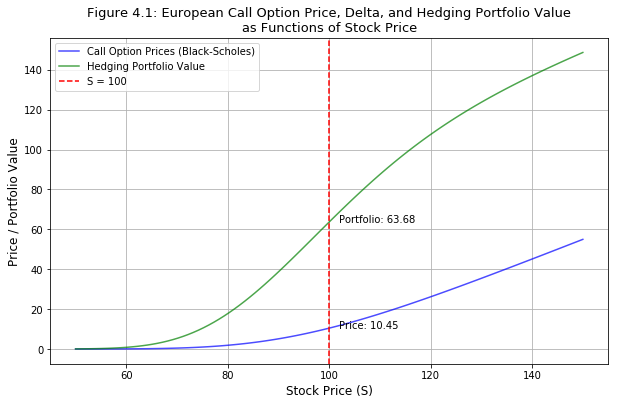

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import os

# Define the Black-Scholes function for European call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Define the Black-Scholes function for Delta (Hedging Portfolio)
def black_scholes_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)  # Delta is ∂C/∂S
    return delta

# Parameters
S = np.linspace(50, 150, 100)  # Stock price range
K = 100                        # Strike price
T = 1                          # Time to expiration (1 year)
r = 0.05                       # Risk-free interest rate
sigma = 0.2                    # Volatility

# Calculate Call prices, Delta values, and Hedging Portfolio Values
call_prices = black_scholes_call(S, K, T, r, sigma)
delta_values = black_scholes_delta(S, K, T, r, sigma)
hedging_portfolio_values = delta_values * S

# Specific calculation for S = 100
S_specific = 100
call_price_specific = black_scholes_call(S_specific, K, T, r, sigma)
delta_specific = black_scholes_delta(S_specific, K, T, r, sigma)
hedging_portfolio_specific = delta_specific * S_specific

# Display specific values
print(f"European Call Option Price for S = {S_specific}: {call_price_specific:.4f}")
print(f"Delta for Hedging Portfolio at S = {S_specific}: {delta_specific:.4f}")
print(f"Hedging Portfolio Value for S = {S_specific}: {hedging_portfolio_specific:.4f}")

# Plot
plt.figure(figsize=(10, 6))

# Plot Call Prices
plt.plot(S, call_prices, label="Call Option Prices (Black-Scholes)", color="blue", alpha=0.7)

# Plot Hedging Portfolio Values
plt.plot(S, hedging_portfolio_values, label="Hedging Portfolio Value", color="green", alpha=0.7)

# Highlight S = 100
plt.axvline(S_specific, color="red", linestyle="--", label=f"S = {S_specific}")
plt.text(S_specific + 2, call_price_specific, f"Price: {call_price_specific:.2f}", color="black", fontsize=10)
plt.text(S_specific + 2, hedging_portfolio_specific, f"Portfolio: {hedging_portfolio_specific:.2f}", color="black", fontsize=10)

# Labels and Title
plt.xlabel("Stock Price (S)", fontsize=12)
plt.ylabel("Price / Portfolio Value", fontsize=12)
plt.title("Figure 4.1: European Call Option Price, Delta, and Hedging Portfolio Value\nas Functions of Stock Price", fontsize=13)

# Legend and Grid
plt.legend()
plt.grid(True)

# Save figure
save_path = r"F:\GITHUB\computational-finance-models\chart"
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, "Figure 4.1 - European_Call_Option_and_Hedging.png"), format='png', dpi=300)

# Show the plot
plt.show()
